# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import display_images

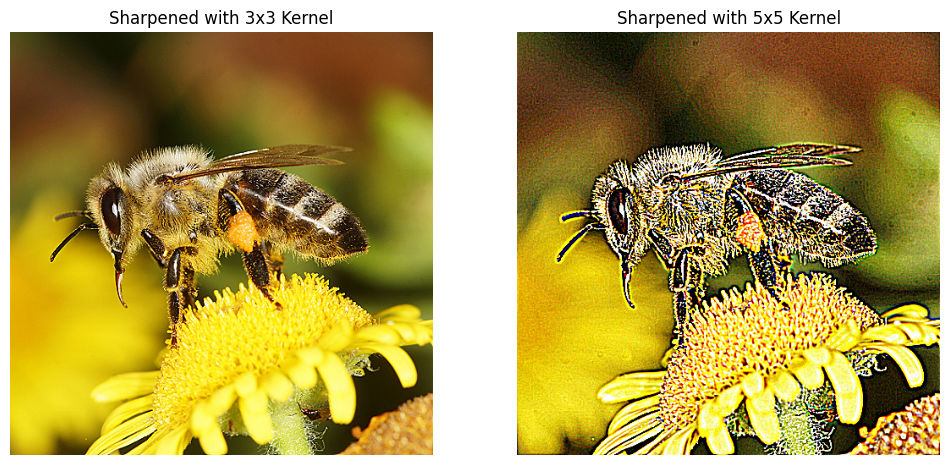

In [11]:
#Question 1
image = cv.imread('images/native-bee.png')

kernel_3x3 = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                           [-1, -1, -1, -1, -1],
                           [-1, -1, 25, -1, -1],
                           [-1, -1, -1, -1, -1],
                           [-1, -1, -1, -1, -1]])

sharpened_3x3 = cv.filter2D(image, -1, kernel_3x3)
sharpened_5x5 = cv2.filter2D(image, -1, kernel_5x5)

sharpened_3x3_rgb = cv.cvtColor(sharpened_3x3, cv.COLOR_BGR2RGB)
sharpened_5x5_rgb = cv.cvtColor(sharpened_5x5, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sharpened_3x3_rgb)
plt.title('Sharpened with 3x3 Kernel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_5x5_rgb)
plt.title('Sharpened with 5x5 Kernel')
plt.axis('off')

plt.show()


2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

In [13]:
#Question 2

lena_image = cv.imread('images/noise_lena.jpg')

average_filtered = cv.blur(lena_image, (5, 5))
gaussian_filtered = cv.GaussianBlur(lena_image, (5, 5), 0)
median_filtered = cv.medianBlur(lena_image, 5)

display_images([lena_image, average_filtered, gaussian_filtered, median_filtered], ['Original', 'Average Filter', 'Gaussian Filter', 'Median Filter'])

#Comment:
#The Average Filter blurs the image by averaging the pixel values
#The Gaussian Filter also blurs the image but uses a Gaussian kernel, resulting in smoother blurring
#The Median Filter is effective in reducing "salt and pepper" noise by replacing each pixel with the median value of its neighborhood

3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

In [15]:
#Question 3
boat_image = cv.imread('images/boat.jpg')

gray_boat = cv.cvtColor(boat_image, cv.COLOR_BGR2GRAY)

_, otsu_thresh = cv.threshold(gray_boat, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

contours, _ = cv.findContours(otsu_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

output_image = boat_image.copy()
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

display_images([boat_image, otsu_thresh, output_image], ['Original', 'Otsu Thresholding', 'Segmented with Bounding Boxes'])